In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('WordDifficulty.csv')
print(df.head(4))

    Word  Length  Freq_HAL  Log_Freq_HAL  I_Mean_RT  I_Zscore    I_SD   Obs  \
0      a       1  10610626         16.18     798.92     -0.01  333.85  24.0   
1    aah       3       222          5.40     816.43      0.21  186.03  21.0   
2  Aaron       5     10806          9.29     736.06     -0.11  289.01  32.0   
3  aback       5       387          5.96     796.27      0.11  171.61  15.0   

   I_Mean_Accuracy  
0             0.73  
1             0.62  
2             0.97  
3             0.45  


## What each columns represents
According to _Word Difficulty Prediction Using Convolutional Neural Networks_ (who provided the dataset),
* **I_Zscore**: the mean lexical decision latency for each word - directly relates to the difficulty of a word.
    * 0 for "simple" & 1 for "difficult" (binary classification).
    * If I_Zscore <= 0, the class is 0.
    * If I_Zscore > 0, the class is 1.
* **Freq_HAL**: Hyperspace Analogue to language frequency norms based on the HAL corpus of 131 million words.

In [3]:
# Check the word that has the highest I_Zscore.
df[df['I_Zscore']==df['I_Zscore'].max()]

,Word,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
9844,diacritical,11,162,5.09,1458.75,2.51,421.41,4.0,0.17


In [4]:
# Check the word that has the lowest I_Zscore.
df[df['I_Zscore']==df['I_Zscore'].min()]

,Word,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
13553,filmdom,7,3,1.1,509.67,-1.03,135.5,3.0,0.09


In [5]:
# Categorize into "simple" and "difficult" words.
simple_word_list = df.loc[df['I_Zscore'] <= 0]
diff_word_list = df.loc[df['I_Zscore'] > 0]
print(f"Number of words in class 0: {len(simple_word_list)}")
print(f"Number of words in class 1: {len(diff_word_list)}")

Number of words in class 0: 22630
Number of words in class 1: 17838


In [6]:
import torch
from transformers import BertTokenizer

In [7]:
model = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model)

/Users/hyunjikim/anaconda3/envs/simple-text/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [8]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [18]:
indicies = np.arange(len(df))
indices_train, indices_test = train_test_split(indicies, test_size=0.3, random_state=42)
df_train = df.iloc[indices_train]
df_test = df.iloc[indices_test]
df_train.head(4)

,Word,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
930,Alice,5,5711,8.65,646.64,-0.46,173.54,33.0,0.97
13574,finality,8,137,4.92,683.08,-0.18,191.29,25.0,0.78
32273,showery,7,2,0.69,782.26,-0.01,329.51,27.0,0.82
13462,fickle,6,291,5.67,735.46,-0.21,204.37,26.0,0.81


In [19]:
# Visualize the distribution of I_Zscore and Freq_HAL of the training data
import matplotlib.pyplot as plt
import seaborn as sns

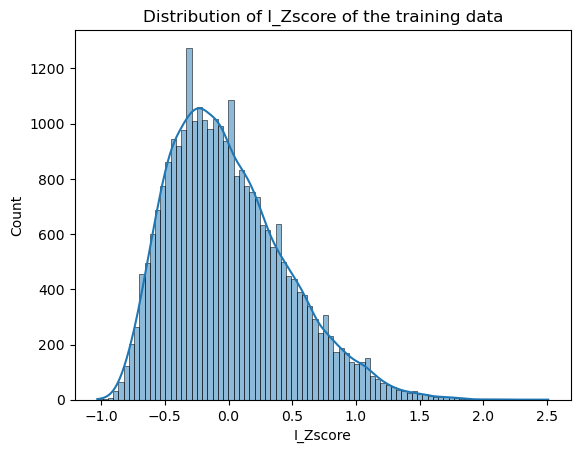

In [20]:
sns.histplot(df_train['I_Zscore'], kde=True)
plt.title('Distribution of I_Zscore of the training data')
plt.xlabel('I_Zscore')
plt.show()

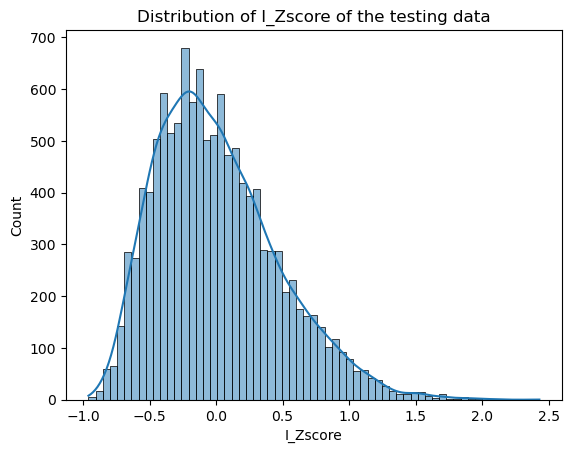

In [21]:
sns.histplot(df_test['I_Zscore'], kde=True)
plt.title('Distribution of I_Zscore of the testing data')
plt.xlabel('I_Zscore')
plt.show()